### Task 1.1

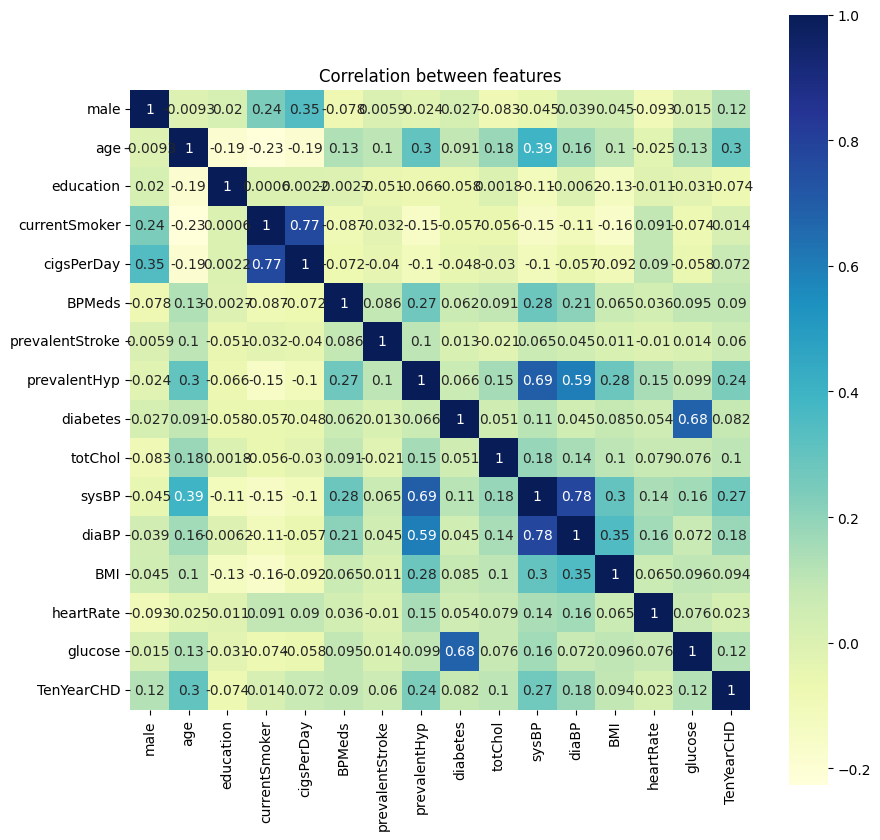

In [267]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("framingham.csv")

# Replace NaN values with mean
df = df.fillna(df.mean())

# Balance the dataset
df_1 = df[df["TenYearCHD"] == 1]
df_0 = df[df["TenYearCHD"] == 0]

if len(df_1) > len(df_0):
    df_1 = df_1.sample(len(df_0))
else:
    df_0 = df_0.sample(len(df_1))

df = pd.concat([df_1, df_0], axis=0)

# Correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=1, square=True, annot=True, cmap="YlGnBu")
plt.title("Correlation between features")
plt.show()

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Store the scaled data in a dataframe
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df = df_scaled

### Task 1.2

Accuracy: 0.6739130434782609


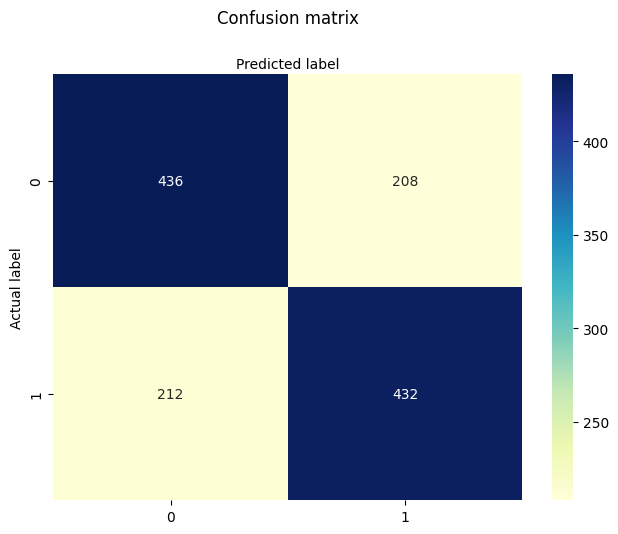

In [268]:
# Select dependent and independent variables
y = df["TenYearCHD"]
X = df[["age", "prevalentHyp", "sysBP", "diaBP", "glucose", "male", "totChol"]]

# Create logistic regression model
logreg = LogisticRegression()

# Fit the model with data              
logreg.fit(X, y)

# Predict the response values for the observations in X
y_pred = logreg.predict(X)

# Plot the confusion matrix
cnf_matrix = metrics.confusion_matrix(y, y_pred)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# print the accuracy
print("Accuracy:",metrics.accuracy_score(y, y_pred))

### Task 1.3

Accuracy: 0.6319875776397516


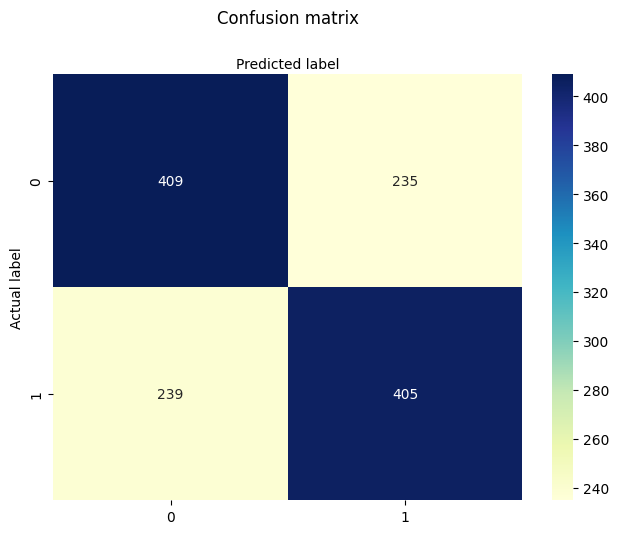

In [269]:
# Use gradient descent to find the optimal weights
sgd = SGDClassifier(loss="log_loss")

# Fit the model with data
sgd.fit(X, y)

# Predict the response values for the observations in X
y_pred = sgd.predict(X)

# Plot the confusion matrix
cnf_matrix = metrics.confusion_matrix(y, y_pred)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# print the accuracy
print("Accuracy:",metrics.accuracy_score(y, y_pred))

### Task 1.4

In [270]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('logistic', LogisticRegression(max_iter=3000))
])

param_grid = {'poly__degree': [1, 2, 3, 4, 5]}
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best polynomial degree:", grid_search.best_params_['poly__degree'])
print("Best mean cross-validated accuracy:", grid_search.best_score_)

Best polynomial degree: 1
Best mean cross-validated accuracy: 0.6728155339805826


### Task 1.5
Al analizar los datos, se puede ver que las variables independientes tienen una baja relación con la variable dependiente que se buscaba analizar. La mayor correlación que se observó en los datos fue con edad, con un 30% de correlación. Esto limitó de manera importante el desempeño del modelo, y es por esto que a pesar de que se utilizaron varios métodos para realizar un módelo, no se logró pasar de un accuracy de 0.7. 